 You have an unfair coin with p(H) = p. You toss the coin n times and note the number of heads obtained. What is the probability that the number of heads would be an even number?

In [3]:
#P(n,Heads is Even) = P((n-1)prev is tail)*P(H)+P((n-1)prev is head)*P(T)
#P(n is even) = (1-p_n-1)*p(H)+(p_n-1)*p(T)
#Each trial is indepedent of past

def prob_unfair_even(n,p):
  prob = 0
  p0 = 1
  pn_1 = p0
  for i in range(n):
    pn = (1-pn_1)*p+(pn_1)*(1-p)
    pn_1 = pn
  return pn

print(prob_unfair_even(10,0.8))

0.5030233088


Exact solution using dp


In [7]:
def exact(n,p):
  term = (1-2*p)**n
  return 0.5*(1+term)

print(exact(10,0.8))

0.5030233088


 A game of dice is begun by rolling an ordinary pair of dice.

 If the sum of the dice is 2, 3, or 12, the player loses.

 If it is 7 or 11, the player wins.

 If it is any other number i, the player continues to roll the dice until the sum is either 7 or i.

 If it is 7, the player loses; if it is i, the player wins.

 Let R denote the number of rolls of the dice in a game of craps. Find:

E[R]

E[R|player wins]

E[R|player loses]

In [ ]:
#E(R) = E(R|W)*P(W)+E(R|L)*P(L) #Even occuring happens

In [13]:
#First: Loss=2|3|12, P(1|L) = 3/12, W = 7|11, P(1|W) = 2/12, if other in-conclusive(C) and continue
#P(1|W) = 2/12, P(1|L) = 3/12, P(1|C) = 7/12
#P(W) = 1/12, P(L) = 1/12, P(C) = 10/12
#P(n|W) = P((n-1)|C)*P(W)+P((n-2)|C)*P(W)+...+P(1|C)*P(W)+P(W)
#P(n|L) = P((n-1)|C)*P(L)+P((n-2)|C)*P(L)+...+P(1|C)*P(L)+P(L)
#P(n|C) = P((n-1)|C)*P(C)+P((n-2)|C)*P(C)+...+P(1|C)*P(C)+P(C)

def Event_n(n):
  #Probability of nth round, means no win or loss till n-1
  p0 = 1
  pw = 1/12
  pl = 1/12
  pc = 10/12
  if(i<=1):
    return pc
  #initialize n-1
  pn_1_w = pw
  pn_1_l = pl
  pn_1_c = pc
  for i in range(n):
    pn_1_w += pn_1_c*pw
    pn_1_l += pn_1_c*pl
    pn_1_c = 1-pn_1_w-pn_1_l
  #if E(n), return pn_1_c
  return pn_1_w
  #if E(n|w), return pn_1_w
  #if E(n|l), return pn_1_l


Generate 2 normal random variables, X~N(1,9) & Y~N(9,16) in Python.

Then add X and Y to get Z.

What is the distribution of Z?

What does Z look like after plotting?

Does the plot support theory?

Text(0, 0.5, 'probability')

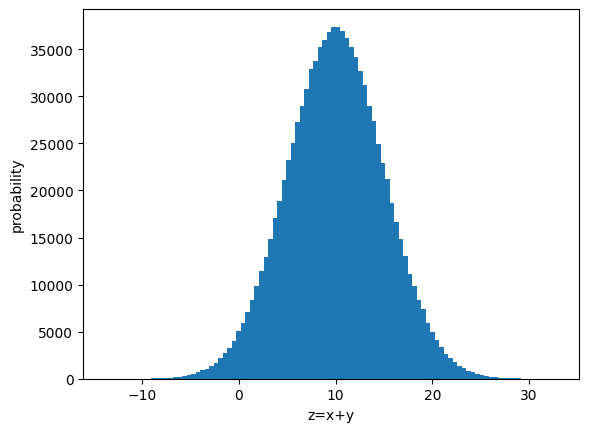

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(1, 3, 1000000)
y = np.random.normal(9, 4, 1000000)

z = x + y

plt.hist(z, bins=100)
plt.xlabel('z=x+y')
plt.ylabel('probability')



Mark was the first to arrive at a 100-seat theatre.

He forgot his seat number and picked a random seat for himself.

After this, every single person who gets to the theatre sits on his/her seat if it is available, and chooses any available seat at random.

John was last to enter the theatre and 99 seats were occupied.

What's the probability that John gets to sit in his own seat?

Can we write a simulation to verify the result?

In [25]:
'''
Mark can sit in any seat, hence one random seat is taken
Probability of nth person in right place?
Should be 0.5, that takes the seat if available

Monte-carlo simulation
'''

import random

def prob_seat(total_seats, niter):
  count = 0 #John gets to be seated in this seat, count+= 1
  #niter is number of experiments with each person
  for i in range(niter):
    seats = [False] * total_seats   #All seats are not occupied
    first_person_seat = random.randint(0, total_seats-1)  #Mark chooses a random seat
    seats[first_person_seat] = True #Mark's seat is filled
    for i in range(1, total_seats-1): #loop for each person out of 98, 0th seat taken
      if(seats[i]) is False:  #if seat is not occupied, takes the seat
        seats[i] = True
      else:   #if seat is occupied, picks a random seat from rest
        unoccupied_seats = [j for j in range(total_seats) if seats[j] is False] #list of all unoccupied seats
        chosen_seat = random.choice(unoccupied_seats) #nth person takes a random seat
        seats[chosen_seat] = True   #nth person takes that seat
    # loop has finished, John comes
    if seats[total_seats-1] is False: #Mark's seat is unoccupied
      count+=1      #Mark got his seat in this loop, else count increments
  return count/niter  #number of times mark got his seat



In [26]:
print("Probability that Mark gets his seat:",prob_seat(total_seats=100,niter=5))


Probability that Mark gets his seat: 0.4


In [27]:
print("Probability that Mark gets his seat:",prob_seat(total_seats=100,niter=10000))


Probability that Mark gets his seat: 0.5113
